<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Calibri; font-size:1.3em;">An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management

<B/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/> Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Loading the Dataset

In [3]:
df = pd.read_csv("insurance_part2_data.csv")

<U/><I/> <span style="font-family:Calibri; font-size:1.2em;"><font color="green"/>Checking the Dataset

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


<I/> <span style="font-family:Calibri; font-size:1.2em;"><font color="green"/>Removing the unwanted colums from the dataset

In [5]:
df=df.drop(["Agency_Code"],axis=True)

<I/> <span style="font-family:Calibri; font-size:1.2em;"><font color="green"/>Analysing the Data Type and cross checking if any values are missing in the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Type          3000 non-null   object 
 2   Claimed       3000 non-null   object 
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   object 
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   object 
 8   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


The data set consist of 3000 rows and 9 columns. There are no missing data in the data. The data consists of Integer, floating and object data types

In [7]:
df.isnull().sum()

Age             0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no missing values in the dataset.

In [8]:
df.shape

(3000, 9)

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Duplicates

There will be some duplication of dataset. Here, we are checking the number of rows before treatment of duplicates and number of rows post treatment of duplicates. In this dataset, we had 139 duplicate rows.

In [9]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of rows before discarding duplicates = 3000
Number of rows after discarding duplicates = 2861


In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 9)


<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Check The Data Object Type

In [11]:
for column in df[['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 
                   'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGE :  70
11      1
77      1
14      1
15      1
84      1
     ... 
35     91
30     91
48    107
31    124
36    880
Name: Age, Length: 70, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


COMMISION :  324
0.21        1
84.13       1
2.00        1
24.00       1
16.45       1
         ... 
17.82      57
54.00      59
63.21      59
23.76      61
0.00     1239
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64


DURATION :  257
416      1
4580     1
127      1
419      1
137      1
        ..
8       71
9       75
11      77
6       77
10      78
Name: Duration, Length: 257, dtype: int64


SALES :  380
287.40      1
192.00      1
17.87       1
80.25       1
209.00      1
         ... 
252.85     57
216.00     57
22.00      79
10.00     122
20.00     172
Name: Sales, Length: 380, dtype: int64


PRODUCT NAME :

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Convert Data Type objects to categorical variable

In [12]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Type          2861 non-null   int8   
 2   Claimed       2861 non-null   int8   
 3   Commision     2861 non-null   float64
 4   Channel       2861 non-null   int8   
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   int8   
 8   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 125.7 KB


<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>EDA

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Type,2861.0,0.597344,0.490518,0.0,0.0,1.00,1.00,1.00
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.00,1.00,1.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.00,1.00,1.00
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.00,2.00,4.00
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.00,0.00,2.00


Statistical Interpretation of the dataset. Here, we analyse the mean, median and standard deviation of the dataset. The minimum and Maximum value of the dataset. 

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Outlier Detection

Outliers are nothing but data points that differ significantly from other observations.Box plot is used for identification of outliers present in the dataset.In this dataset we have outlier present in Duration, Sales and Commission. Minimal oulier is present in Age, Channel, Product Name and Destination.

<AxesSubplot:>

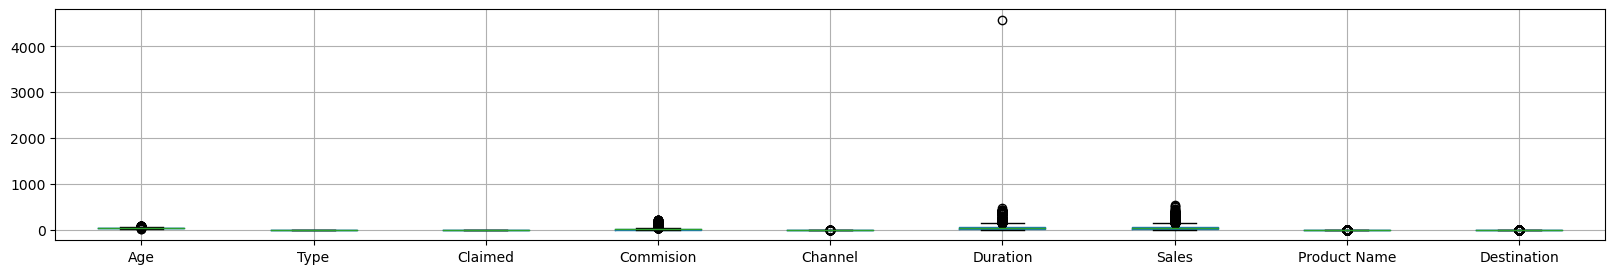

In [15]:
df.boxplot(figsize=(20,3))

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Outlier Treatment

Box plots help us visualize the outliers with the help of IQR(Interquartile) range. They are the standardized way of displaying the distribution of data based on “minimum”, “first quartile(Q1)”, “median(Q2)”, “third quartile(Q3)” and “maximum”. All the data points below “minimum” and above “maximum” are considered as outliers.
Where, Outlier Detection

IQR = Q3 – Q1   
minimum = Q1 – 1.5*IQR
maximum = Q3 + 1.5*IQR  

Picture Courtesy : Internet

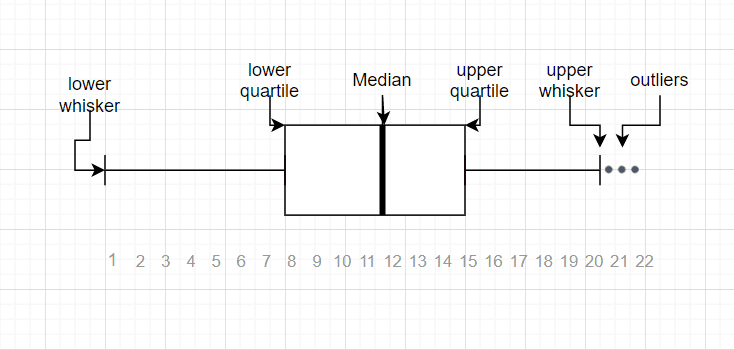

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
lratio,uratio=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uratio,uratio,df['Age'])
df['Age']=np.where(df['Age']<lratio,lratio,df['Age'])

lratio,uratio=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>uratio,uratio,df['Commision'])
df['Commision']=np.where(df['Commision']<lratio,lratio,df['Commision'])

lratio,uratio=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>uratio,uratio,df['Duration'])
df['Duration']=np.where(df['Duration']<lratio,lratio,df['Duration'])

lratio,uratio=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>uratio,uratio,df['Sales'])
df['Sales']=np.where(df['Sales']<lratio,lratio,df['Sales'])

lratio,uratio=remove_outlier(df['Product Name'])
df['Product Name']=np.where(df['Product Name']>uratio,uratio,df['Product Name'])
df['Product Name']=np.where(df['Product Name']<lratio,lratio,df['Product Name'])

lratio,uratio=remove_outlier(df['Destination'])
df['Destination']=np.where(df['Destination']>uratio,uratio,df['Destination'])
df['Destination']=np.where(df['Destination']<lratio,lratio,df['Destination'])

<AxesSubplot:>

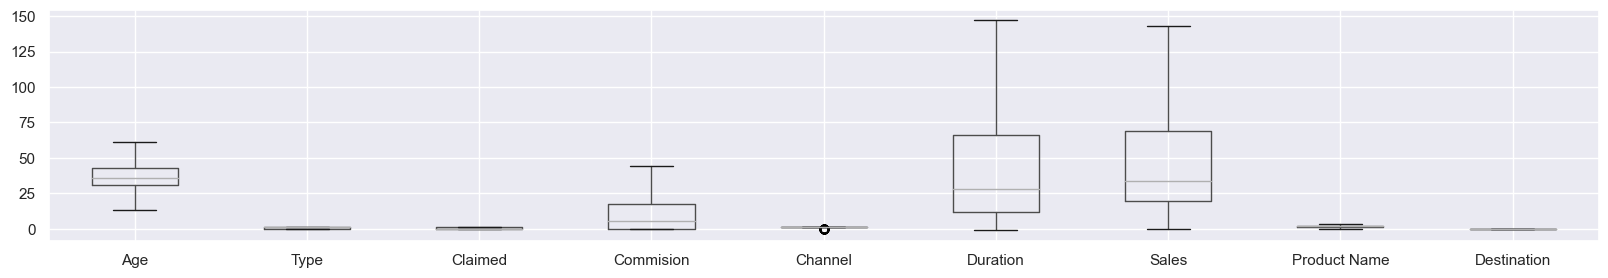

In [24]:
df.boxplot(figsize=(20,3))

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Correlation Matrix

Correlation means the association between two variables. Pearson Correlation is the most commonly used technique in Correlation Matrix

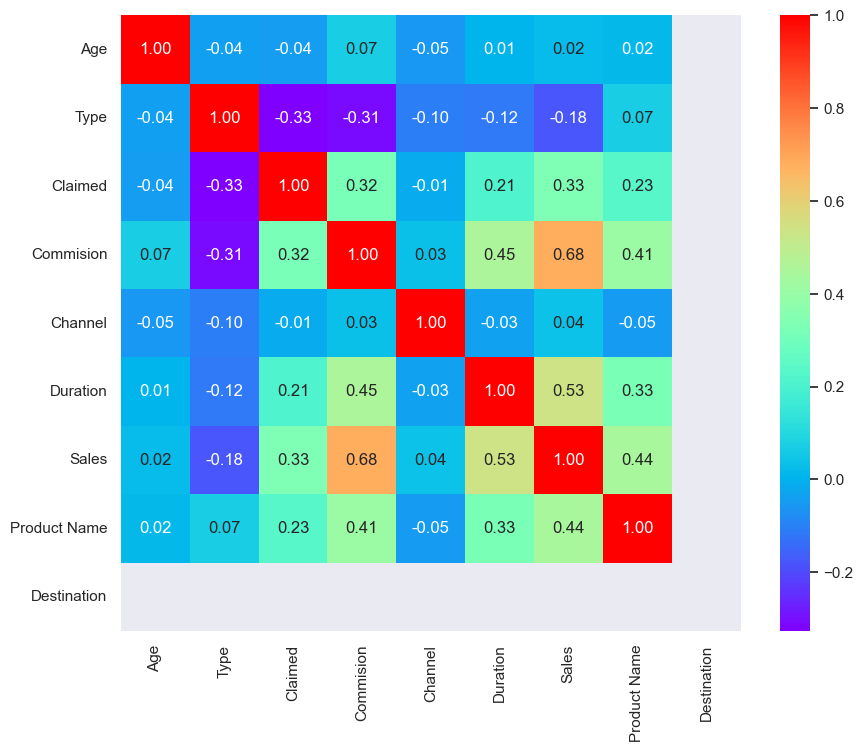

In [25]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

<span style="font-family:Calibri; font-size:1.3em;"> The Heat map shows the Redish colour as highly correlated and Blue as less correlation. Here data is low correlated. Most of the data are positively correlated.

Graphical representation of Correlation Matrix

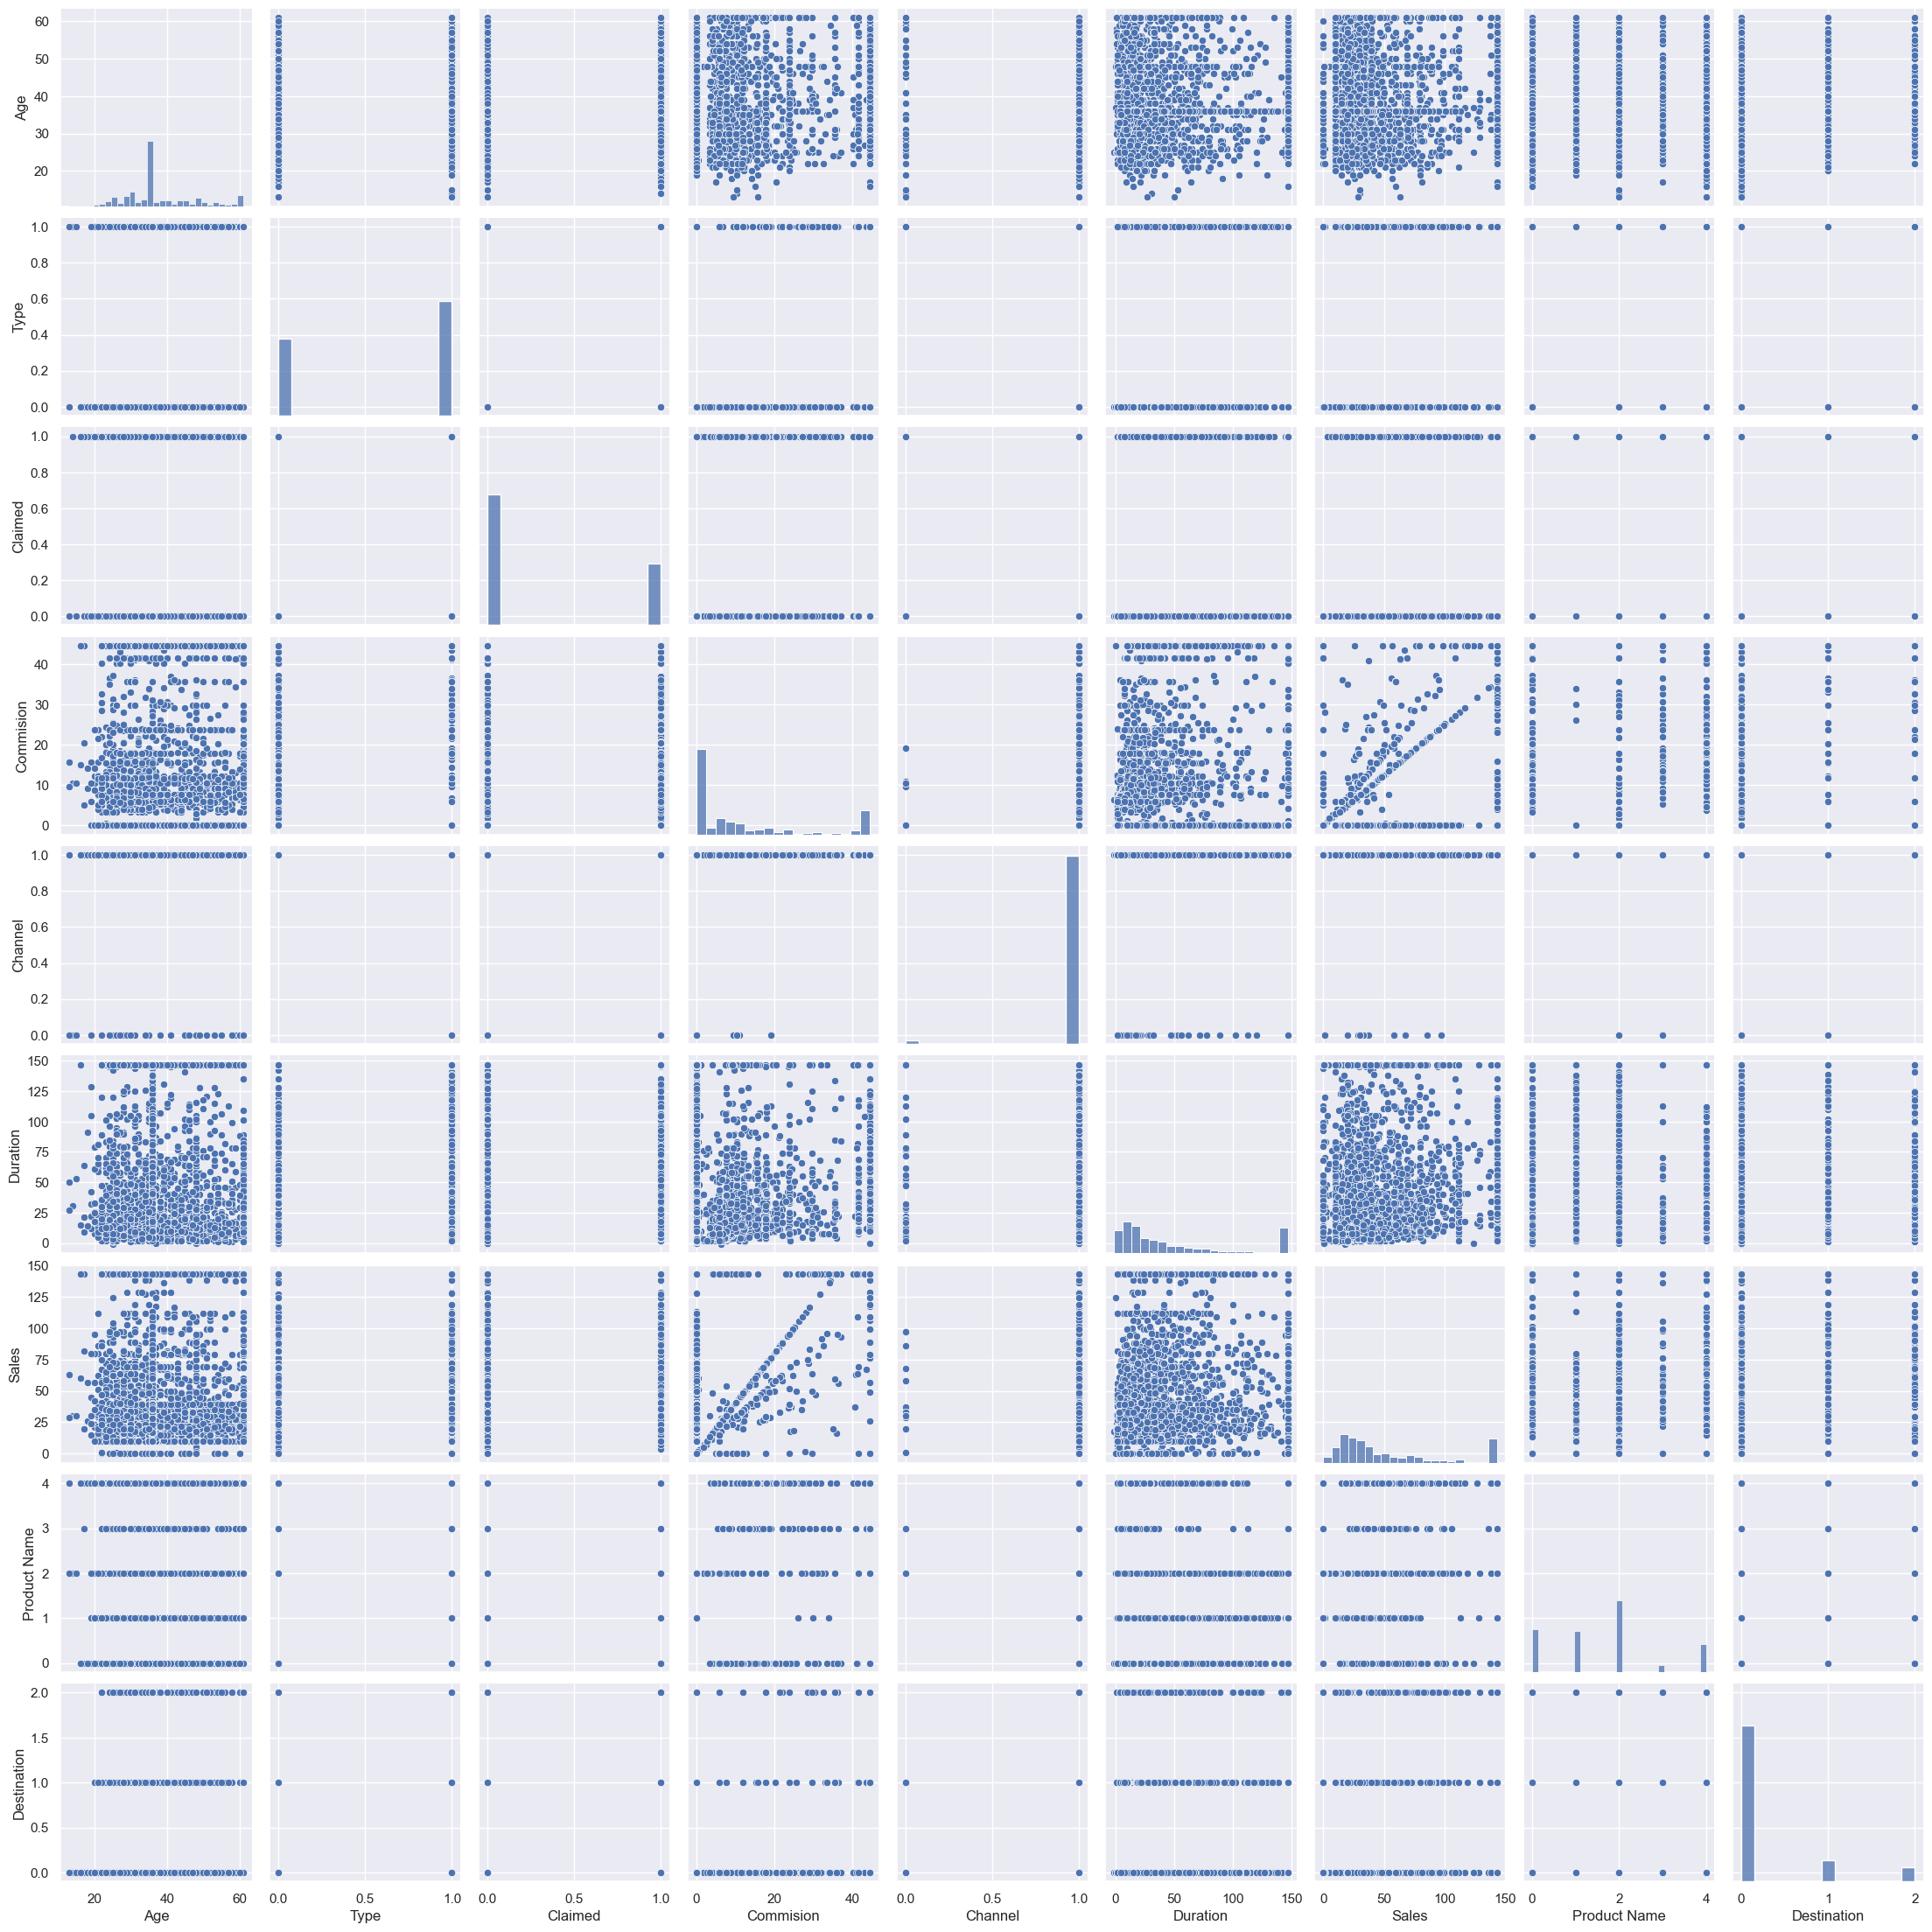

In [20]:
sns.pairplot(df[['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales','Product Name','Destination']])

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Proportion of 1's and 0's

Percentage of 0's 68.05 %
Percentage of 1's 31.95 %


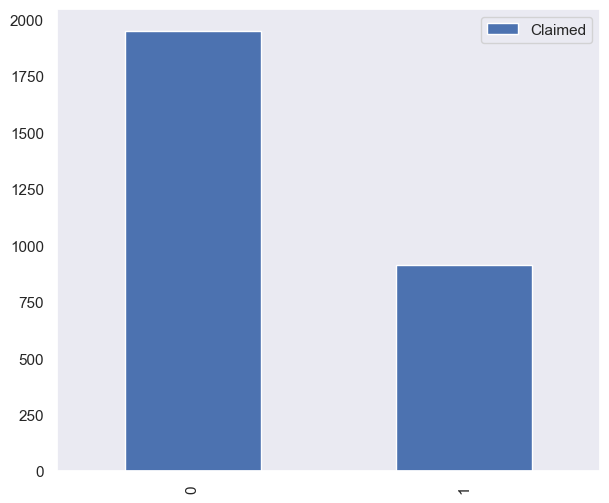

In [26]:
plt.figure(figsize=(7,6))
df['Claimed'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()
print("Percentage of 0's",round(df.Claimed.value_counts().values[0]/df.Claimed.count()*100,2),'%')
print("Percentage of 1's",round(df.Claimed.value_counts().values[1]/df.Claimed.count()*100,2),'%')

<span style="font-family:Calibri; font-size:1.3em;"> 0 indicates "No" Claims and 1 indicates "Claimed". The data sets says that 68% percent have not claimed their travel insurance and 31% have claimed their travel insurance.

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Train-Test Split

In [27]:
X = df.drop("Claimed", axis=1)
y = df.pop("Claimed")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Decision Tree - CART

In [28]:
dtree = DecisionTreeClassifier(random_state=0)

Fit the model

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
predictions = dtree.predict(X_test)

Creating the Decision Tree Model

In [33]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('C:/Users/Dell/OneDrive/Documents/Deakin/Insurance_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

www.webgraphviz.com

In [34]:
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.180133
Type          0.005029
Commision     0.098749
Channel       0.008854
Duration      0.254734
Sales         0.225695
Product Name  0.226805
Destination   0.000000


The important features in Tree model is Product Name, Sales, Duration and Age. Based on these attributes the tree is constructed by using Gini Index.

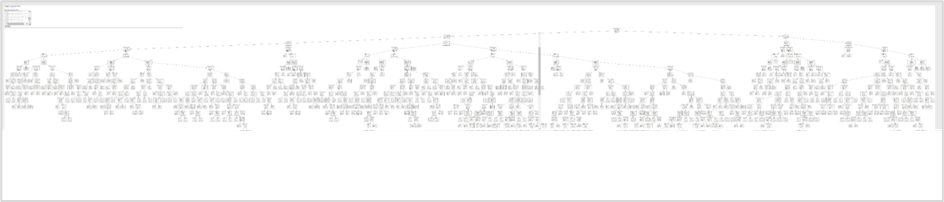

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Pruning of Decision Tree

In [35]:
y_predict = dtree.predict(X_test)

In [36]:
reg_dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,min_samples_leaf=10,min_samples_split=150,random_state=0)
reg_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=150,
                       random_state=0)

In [37]:
Insurance_tree_regularized = open('C:/Users/Dell/OneDrive/Documents/Deakin/Insurance_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dtree, out_file= Insurance_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

Insurance_tree_regularized.close()

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.180133
Type          0.005029
Commision     0.098749
Channel       0.008854
Duration      0.254734
Sales         0.225695
Product Name  0.226805
Destination   0.000000


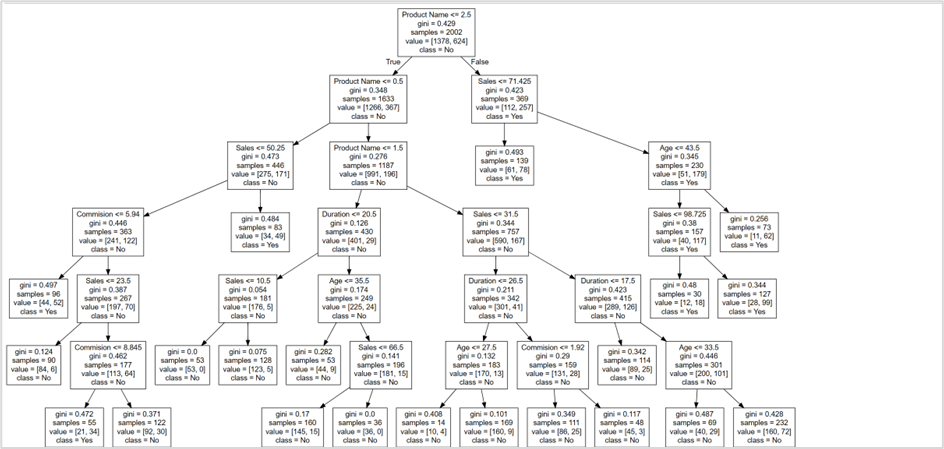

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Prediction based on Train Data & Test Data

In [38]:
ytrain_predict = reg_dtree.predict(X_train)
ytest_predict = reg_dtree.predict(X_test)

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Classification Report

The classification report will share us the performance of the model. The performance of the model is split as below: 
	Confusion Matrix 
	Accuracy of the model 
	Sensitivity of the model 
	Precision of the model 
	Specificity of the model.


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       569
           1       0.52      0.53      0.53       290

    accuracy                           0.68       859
   macro avg       0.64      0.64      0.64       859
weighted avg       0.68      0.68      0.68       859



<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>AUC Curve based on Train Data & Test Data

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The higher the area under the ROC curve (AUC), the better the classifier. A classifier with an AUC higher than 0.5 is better than a random classifier. If AUC is lower than 0.5, then something is wrong with your model. A perfect classifier would have an AUC of 1.

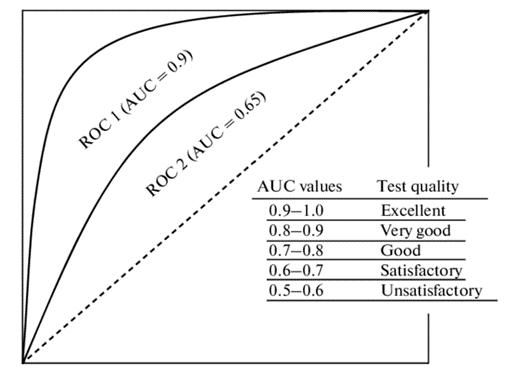

AUC: 0.826


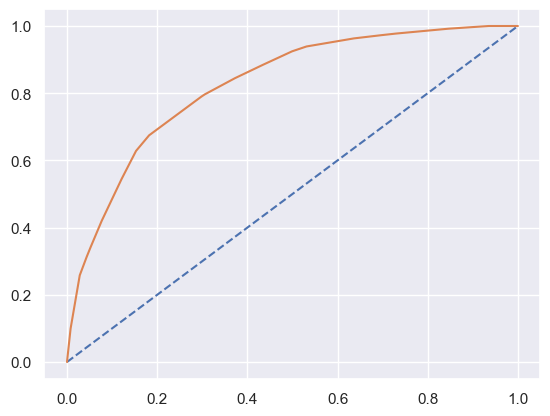

In [40]:
# predict probabilities
probs = reg_dtree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

Area Under the Curve is 83%. This shows the training model is "Very Good " Model

AUC: 0.784


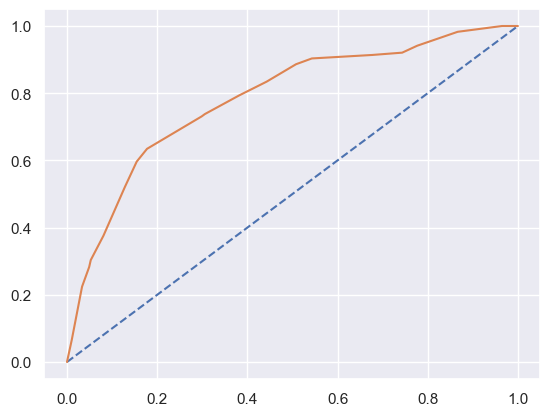

In [41]:
# predict probabilities
probs = reg_dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

Area Under the Curve is 78%. This shows the test model is "Good " Model

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Accuracy / Confusion Matrix on Train & Test Data

In [42]:
confusion_matrix(y_train, ytrain_predict)

array([[1167,  211],
       [ 232,  392]], dtype=int64)

In [43]:
cart_train_acc=reg_dtree.score(X_train,y_train) 
cart_train_acc

0.7787212787212787

In [44]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.63
cart_train_recall  0.64
cart_train_f1  0.65


In [45]:
confusion_matrix(y_test, ytest_predict)

array([[481,  88],
       [117, 173]], dtype=int64)

In [46]:
cart_test_acc=reg_dtree.score(X_test,y_test)
cart_test_acc

0.7613504074505238

In [47]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       569
           1       0.66      0.60      0.63       290

    accuracy                           0.76       859
   macro avg       0.73      0.72      0.73       859
weighted avg       0.76      0.76      0.76       859



In [48]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.6
cart_test_recall  0.63
cart_test_f1  0.66


<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>ROC Curve

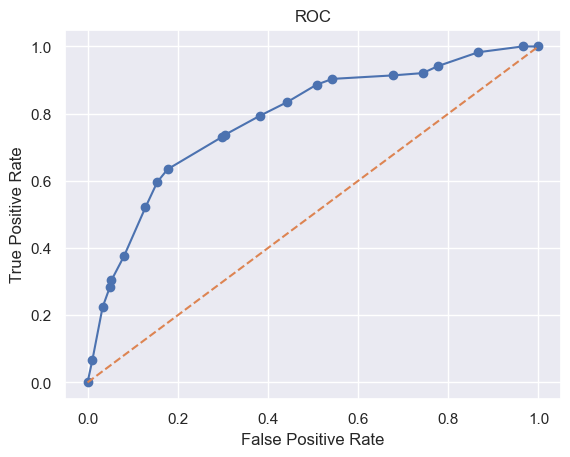

In [49]:
dt_fpr, dt_tpr,_=roc_curve(y_test,reg_dtree.predict_proba(X_test)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Train Data:
AUC: 82.6%
Accuracy: 77.8%
Sensitivity: 64%
Precision: 63%
f1-Score: 65%

Test Data:
AUC: 78.4%
Accuracy:76.1%
Sensitivity: 63%
Precision: 60%
f1-Score: 66%

Training and Test set results are almost similar, where we can conclude by saying model is a good one.

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Random Forest

A random forest consists of multiple random decision trees. Two types of randomnesses are built into the trees. First, each tree is built on a random sample from the original data. Second, at each tree node, a subset of features are randomly selected to generate the best split.

In [50]:
rfcl = RandomForestClassifier(n_estimators = 350, random_state=0,oob_score=True)
rfcl = rfcl.fit(X_train, y_train)

Out Of Bag Score is the way of validating Random Forest model. 73.87 % of total training data are available as OOB sample for each DT and hence it can be used for evaluating or validating the random forest model.

In [51]:
rfcl.oob_score_

0.7387612387612388

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'max_depth': [7],#10
    'max_features': [4],#6
    'min_samples_leaf': [50],#150
    'min_samples_split': [150],#550
    'n_estimators': [350]#50
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [54]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [4],
                         'min_samples_leaf': [50], 'min_samples_split': [150],
                         'n_estimators': [350]})

In [55]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 350}

In [56]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=350)

In [57]:
best_grid=grid_search.best_estimator_

In [58]:
best_grid

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=350)

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Train - Test Split for Random Forest

In [59]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Confusion Matrix- Train Data

In [60]:
confusion_matrix(y_train,ytrain_predict)

array([[1257,  121],
       [ 342,  282]], dtype=int64)

In [61]:
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.7687312687312687

In [62]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1378
           1       0.70      0.45      0.55       624

    accuracy                           0.77      2002
   macro avg       0.74      0.68      0.70      2002
weighted avg       0.76      0.77      0.75      2002



In [63]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.45
rf_train_recall  0.55
rf_train_f1  0.7


<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>AUC for Train & Test

Area under Curve is 0.6820573294629898


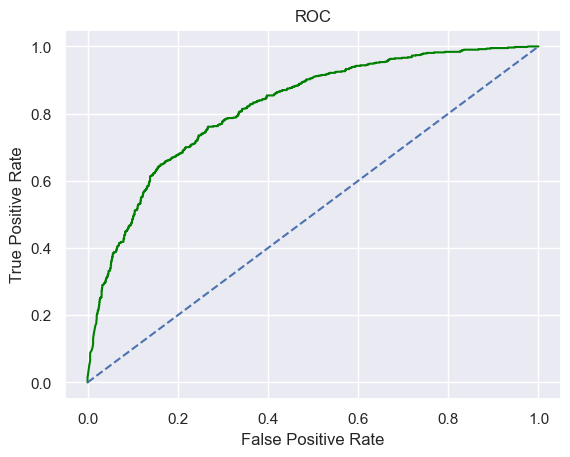

In [64]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Confusion Matrix- Test Data

In [65]:
confusion_matrix(y_test,ytest_predict)

array([[515,  54],
       [170, 120]], dtype=int64)

In [66]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

0.7392316647264261

In [67]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       569
           1       0.69      0.41      0.52       290

    accuracy                           0.74       859
   macro avg       0.72      0.66      0.67       859
weighted avg       0.73      0.74      0.72       859



In [68]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.41
rf_test_recall  0.52
rf_test_f1  0.69


<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>AUC- Test Data

Area under Curve is 0.6594448821283558


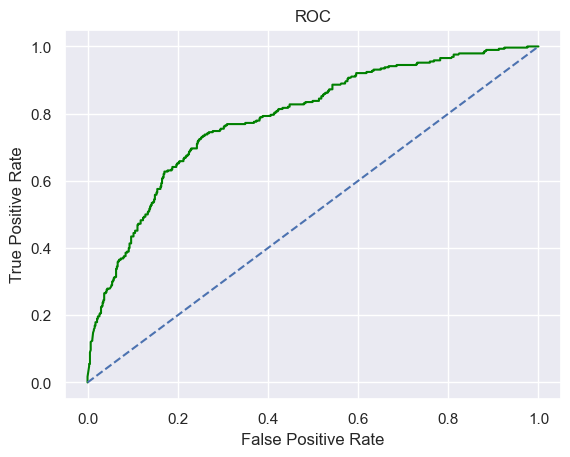

In [69]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [70]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.425551
Sales         0.181949
Commision     0.164812
Type          0.155598
Duration      0.052266
Age           0.019825
Channel       0.000000
Destination   0.000000


<B/><span style="font-family:Calibri; font-size:2em;"><font color="green"/>Final Conclusion

<B/><I/> <span style="font-family:Calibri; font-size:1.5em;"><font color="green"/>Comparison between Decision Tree & Random Forest

In [71]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test
Accuracy,0.78,0.76,0.77,0.74
AUC,0.83,0.78,0.68,0.66
Recall,0.64,0.63,0.55,0.52
Precision,0.63,0.60,0.45,0.41
F1 Score,0.65,0.66,0.70,0.69


<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Green"/>ROC Curve for the 2 models on the Training data

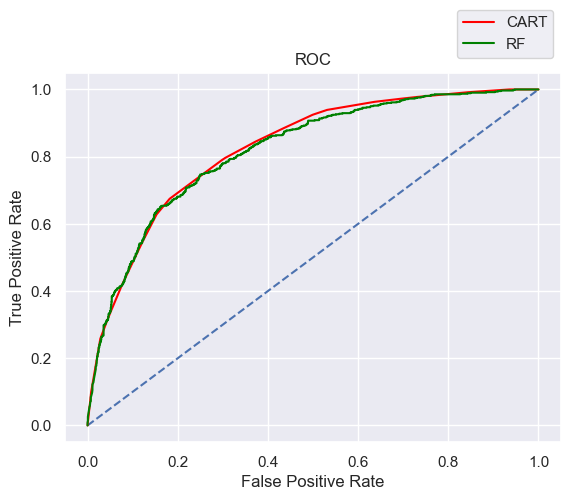

In [81]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

The graphs shows that ROC curve for Training shows both Random Forest and CART are graphed equally on the curve. For the training data we opt for the CART or Decision tree and Random Forest as the best model.

<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Green"/>ROC Curve for the 2 models on the Test data

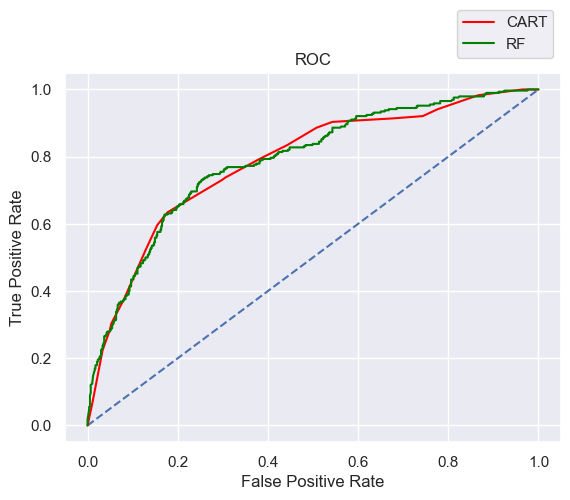

In [72]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

<span style="font-family:Calibri; font-size:1.3em;">Compared with 2 models, CART and Random forest are the strongest models. Here we could find the Product Name has a significant role in getting the insurance claimed or not. We could find the majority of the travellers have not claimed their insurance. Hence the business should increase the sale in the best product plan that would help the business in getting less claims.